In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
df = pd.read_csv("HR_Data_MNC_Data Science Lovers.csv")

In [4]:
df.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
296474,EMP0296475,Angela Wood,Finance,Financial Analyst,2025-07-15,"Priceburgh, Namibia",2,0,Resigned,On-site,650049


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype
---  ------              -----
 0   Employee_ID         str  
 1   Full_Name           str  
 2   Department          str  
 3   Job_Title           str  
 4   Hire_Date           str  
 5   Location            str  
 6   Performance_Rating  int64
 7   Experience_Years    int64
 8   Status              str  
 9   Work_Mode           str  
 10  Salary_INR          int64
dtypes: int64(3), str(8)
memory usage: 167.8 MB


In [8]:
df.isnull().sum()

Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [9]:
df.describe()

,Performance_Rating,Experience_Years,Salary_INR
count,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.000148e+00,5.010287e+00,8.968878e+05
std,1.413973e+00,3.608823e+00,4.026103e+05
min,1.000000e+00,0.000000e+00,3.000000e+05
25%,2.000000e+00,2.000000e+00,6.163460e+05
50%,3.000000e+00,5.000000e+00,8.110265e+05
75%,4.000000e+00,8.000000e+00,1.073745e+06
max,5.000000e+00,1.500000e+01,2.999976e+06


 What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?

In [10]:
df.Status.unique()

<StringArray>
['Resigned', 'Active', 'Terminated', 'Retired']
Length: 4, dtype: str

In [14]:
df_employee_count = df.groupby("Status")['Employee_ID'].count().reset_index(name='Employee_count')
df_employee_count

,Status,Employee_count
0,Active,1401558
1,Resigned,398660
2,Retired,99912
3,Terminated,99870


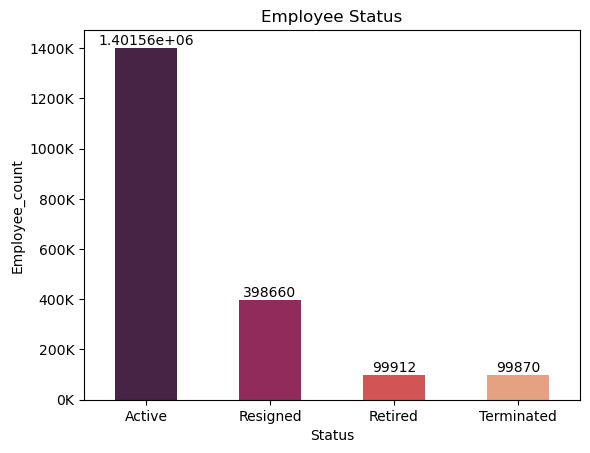

In [26]:
sns.barplot(data=df_employee_count,x="Status",y="Employee_count",hue="Status",palette='rocket',width=0.5)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Employee Status")
plt.show()

What is the distribution of work modes (On-site, Remote) ?

In [27]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
1585498,EMP1585499,Cassandra Thompson,Sales,Account Manager,2013-10-23,"Timothystad, South Africa",4,11,Active,On-site,1173577


In [29]:
df_work_mode = df.groupby("Work_Mode")['Employee_ID'].count().reset_index(name='Employee_count')
df_work_mode

,Work_Mode,Employee_count
0,On-site,1199109
1,Remote,800891


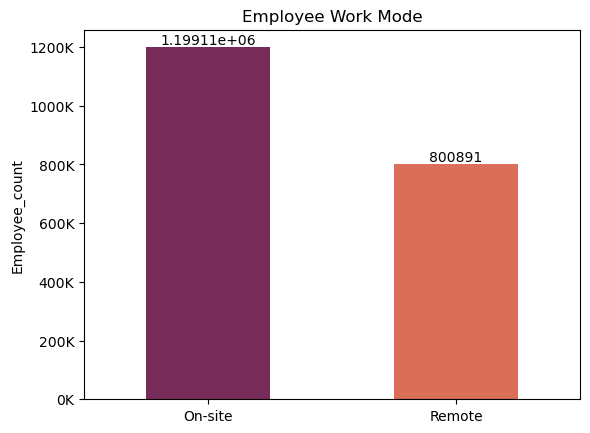

In [34]:
sns.barplot(data=df_work_mode,x="Work_Mode",y="Employee_count",hue="Work_Mode",palette='rocket',width=0.5)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Employee Work Mode")
plt.xlabel("")
plt.show()


 How many employees are there in each department ?

In [35]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
1669483,EMP1669484,Zachary Pitts,Sales,Account Manager,2017-09-04,"New Cherylberg, Bouvet Island (Bouvetoya)",3,7,Resigned,Remote,1002064


In [ ]:
df_department = df.groupby("Department")['Employee_ID'].count().reset_index(name='Employee_count').sort_values("Employee_count",ascending=False)
df_department

,Department,Employee_count
2,IT,601042
6,Sales,400031
4,Operations,300095
3,Marketing,240081
0,Finance,199873
1,HR,159119
5,R&D,99759


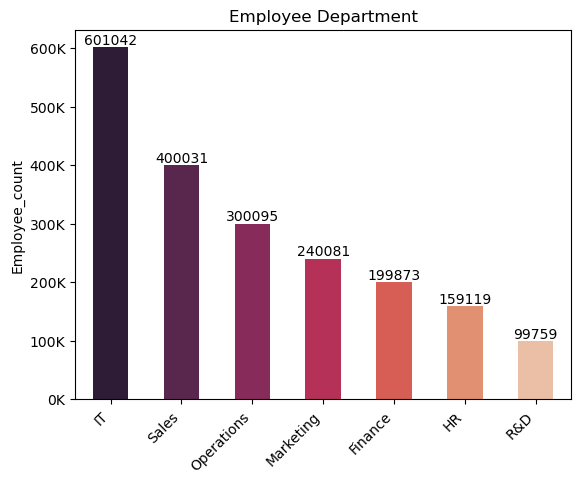

In [41]:
sns.barplot(data=df_department,x="Department",y="Employee_count",hue="Department",palette='rocket',width=0.5)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Employee Department")
plt.xlabel("")
plt.xticks(rotation=45,ha="right")
plt.show()


 What is the average salary by Department ?

In [61]:
df_department_salary = df.groupby("Department")['Salary_INR'].mean().reset_index(name='Salary').sort_values("Salary",ascending=False)
df_department_salary

,Department,Salary
2,IT,1.129858e+06
0,Finance,9.404117e+05
5,R&D,8.003772e+05
6,Sales,7.929579e+05
3,Marketing,7.699362e+05
4,Operations,7.546263e+05
1,HR,7.438536e+05


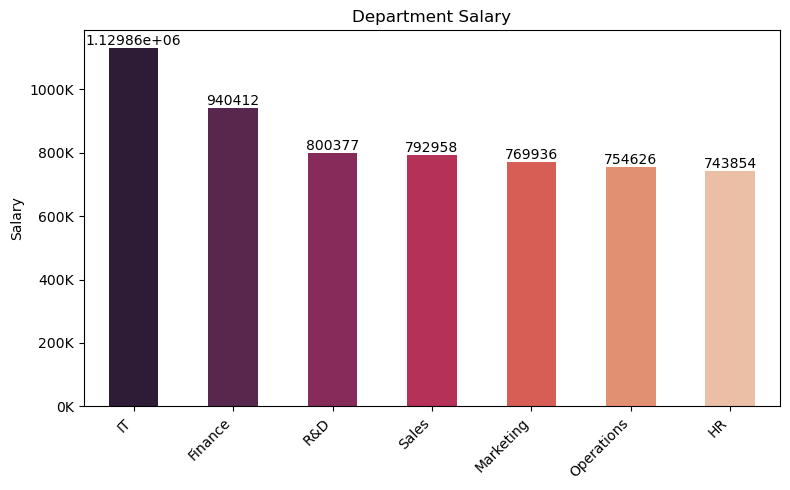

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_department_salary,x="Department",y="Salary",hue="Department",palette='rocket',width=0.5)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Department Salary")
plt.xlabel("")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()



 Which job title has the highest average salary ?

In [64]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
1527312,EMP1527313,Richard Anderson,Sales,Sales Executive,2018-12-12,"New Derek, Hungary",5,6,Active,On-site,640560


In [65]:
df.Job_Title.nunique()

29

In [66]:
df_title_salary = df.groupby("Job_Title")['Salary_INR'].mean().reset_index(name='Salary').sort_values("Salary",ascending=False)
df_title_salary

,Job_Title,Salary
14,IT Manager,2.098156e+06
9,Finance Manager,1.743242e+06
13,HR Manager,1.252402e+06
3,Business Development Manager,1.252016e+06
26,Software Engineer,1.199261e+06
10,Financial Analyst,1.051523e+06
2,Brand Manager,8.031278e+05
15,Innovation Manager,8.018701e+05
28,Talent Acquisition Specialist,8.014222e+05
5,CTO,8.014028e+05


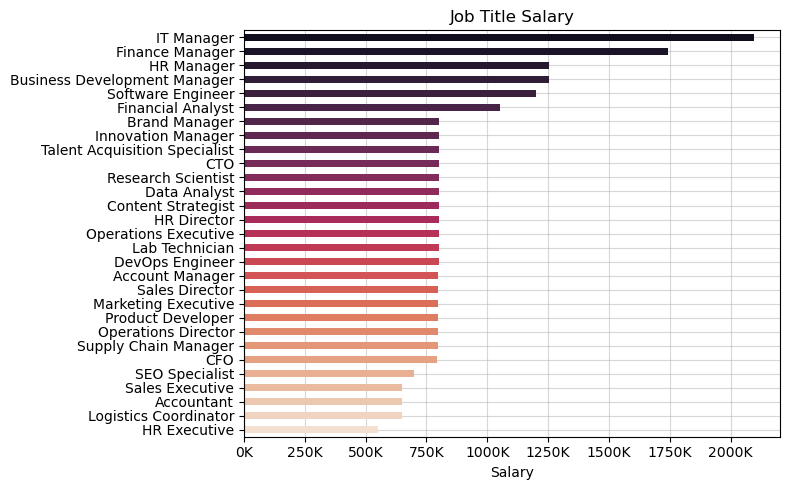

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_title_salary,x="Salary",y="Job_Title",hue="Job_Title",palette='rocket',width=0.5)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Job Title Salary")
plt.ylabel("")

plt.tight_layout()
plt.show()



What is the average salary in different Departments based on Job Title ?

In [88]:
df.groupby(["Job_Title","Department"])['Salary_INR'].mean().reset_index(name='Salary').sort_values(["Department", "Salary"], ascending=[False, False])

,Job_Title,Department,Salary
3,Business Development Manager,Sales,1.252016e+06
0,Account Manager,Sales,7.993737e+05
24,Sales Director,Sales,7.990694e+05
25,Sales Executive,Sales,6.502378e+05
15,Innovation Manager,R&D,8.018701e+05
22,Research Scientist,R&D,8.013149e+05
16,Lab Technician,R&D,8.001815e+05
21,Product Developer,R&D,7.986523e+05
20,Operations Executive,Operations,8.003509e+05
19,Operations Director,Operations,7.982981e+05


In [90]:
df_department_title_salary = df.groupby(["Job_Title","Department"])['Salary_INR'].mean().reset_index(name='Salary').sort_values("Salary", ascending=False)

In [93]:
df_department_title_salary['Job_Department'] = df_department_title_salary['Job_Title'] + " (" + df_department_title_salary['Department'] + ")"

In [94]:
df_department_title_salary

,Job_Title,Department,Salary,Job_Department
14,IT Manager,IT,2.098156e+06,IT Manager (IT)
9,Finance Manager,Finance,1.743242e+06,Finance Manager (Finance)
13,HR Manager,HR,1.252402e+06,HR Manager (HR)
3,Business Development Manager,Sales,1.252016e+06,Business Development Manager (Sales)
26,Software Engineer,IT,1.199261e+06,Software Engineer (IT)
10,Financial Analyst,Finance,1.051523e+06,Financial Analyst (Finance)
2,Brand Manager,Marketing,8.031278e+05,Brand Manager (Marketing)
15,Innovation Manager,R&D,8.018701e+05,Innovation Manager (R&D)
28,Talent Acquisition Specialist,HR,8.014222e+05,Talent Acquisition Specialist (HR)
5,CTO,IT,8.014028e+05,CTO (IT)


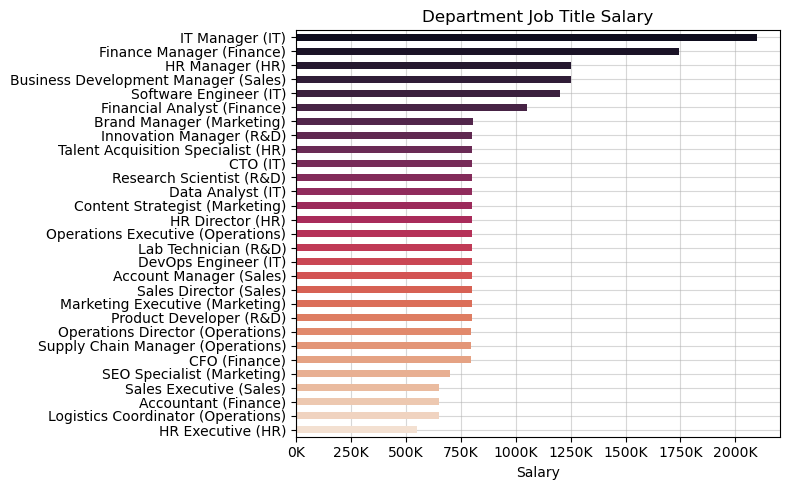

In [100]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_department_title_salary,x="Salary",y="Job_Department",hue="Job_Department",palette='rocket',width=0.5)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Department Job Title Salary")
plt.ylabel("")
plt.tight_layout()
plt.show()



How many employees Resigned & Terminated in each department ?

In [101]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
804065,EMP0804066,Mr. Paul Gonzalez,Marketing,SEO Specialist,2025-02-11,"Deleonmouth, Congo",4,0,Resigned,On-site,950355


In [102]:
df.Status.unique()

<StringArray>
['Resigned', 'Active', 'Terminated', 'Retired']
Length: 4, dtype: str

In [105]:
removed = ["Resigned","Terminated"]
df_removed = df[df["Status"].isin(removed)].copy()
df_removed.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
8,EMP0000009,Cathy Thompson,Finance,Financial Analyst,2018-05-29,"South Catherine, Belize",4,7,Resigned,Remote,1138452
11,EMP0000012,Kevin Lowe,Sales,Account Manager,2024-07-02,"East Kent, Qatar",3,1,Resigned,On-site,1111759
16,EMP0000017,Robert Martin,Operations,Logistics Coordinator,2025-05-13,"Laurahaven, Afghanistan",3,0,Resigned,On-site,859025
19,EMP0000020,Donald Hoffman,Marketing,Content Strategist,2022-04-01,"South James, New Zealand",3,3,Resigned,On-site,965154


In [109]:
df_department_remove_count = df_removed.groupby(["Department","Status"])["Employee_ID"].count().reset_index(name="Count")
df_department_remove_count

,Department,Status,Count
0,Finance,Resigned,40238
1,Finance,Terminated,9988
2,HR,Resigned,31736
3,HR,Terminated,7861
4,IT,Resigned,119852
5,IT,Terminated,29881
6,Marketing,Resigned,47793
7,Marketing,Terminated,12044
8,Operations,Resigned,59397
9,Operations,Terminated,14884


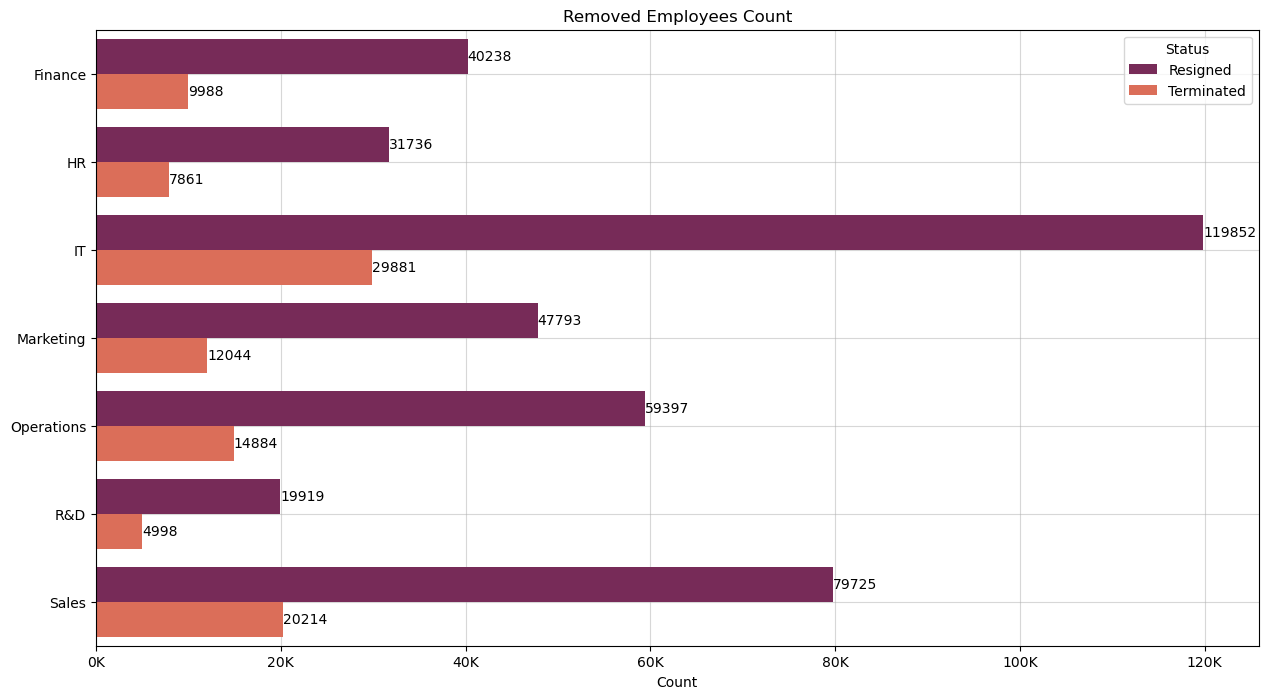

In [121]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_department_remove_count, y = "Department", x = "Count", hue = "Status",palette="rocket")
ax=plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
for container in ax.containers:
    ax.bar_label(container)
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.ylabel("")
plt.title("Removed Employees Count")
plt.show()

 How does salary vary with years of experience ?

In [122]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
1831618,EMP1831619,Susan Clark,Finance,Accountant,2025-01-16,"East Patriciaville, Bahamas",5,0,Active,On-site,811898


In [125]:
df.Experience_Years.unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15])

In [141]:
df_year_salary = df.groupby("Experience_Years")['Salary_INR'].mean().sort_values().reset_index(name="Salary")
df_year_salary

,Experience_Years,Salary
0,14,895610.790251
1,15,895647.401051
2,10,895662.027882
3,7,895722.673960
4,1,895903.759824
5,6,896012.632467
6,12,896432.933416
7,5,896484.084828
8,0,896737.454775
9,2,896755.652313


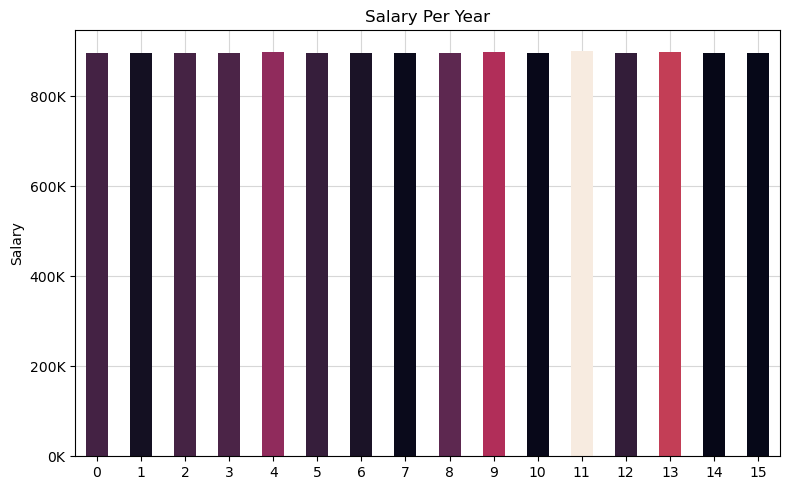

In [142]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_year_salary,x="Experience_Years",y="Salary",hue="Salary",palette='rocket',width=0.5,legend=False)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)

ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.title("Salary Per Year")
plt.xlabel("")
plt.tight_layout()
plt.show()



What is the average performance rating by department ?

In [143]:
df_department_rating = df.groupby("Department")['Performance_Rating'].mean().sort_values(ascending=False).reset_index(name='Rating')
df_department_rating

,Department,Rating
0,Sales,3.006362
1,Marketing,3.004736
2,R&D,3.001885
3,IT,2.998216
4,Finance,2.996818
5,Operations,2.996081
6,HR,2.995670


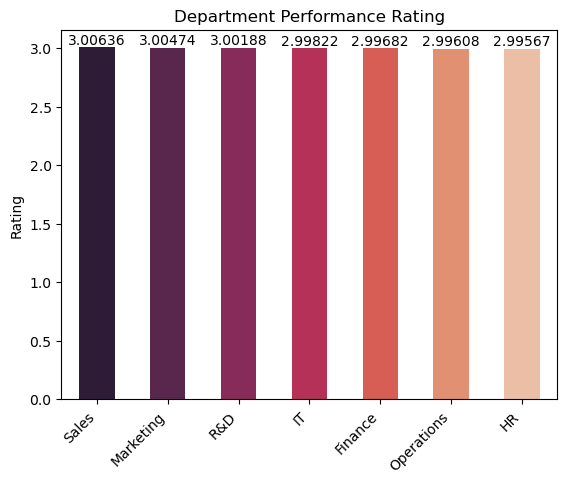

In [146]:
sns.barplot(data=df_department_rating,x="Department",y="Rating",hue="Department",palette='rocket',width=0.5,legend=False)
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.title("Department Performance Rating")
plt.xlabel("")
plt.xticks(rotation=45,ha="right")
plt.show()


 Which Country have the highest concentration of employees ?

In [147]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
1862690,EMP1862691,Robert Russell,IT,Data Analyst,2023-11-25,"Stricklandchester, Turkmenistan",3,1,Retired,Remote,696443


In [149]:
df[["City", "Country"]] = df["Location"].str.split(",", expand=True)
df["City"] = df["City"].str.strip()
df["Country"] = df["Country"].str.strip()
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country
1909800,EMP1909801,Jordan Acosta,Sales,Sales Executive,2016-07-24,"East Laurie, Pitcairn Islands",4,9,Resigned,Remote,409394,East Laurie,Pitcairn Islands


In [154]:
df_top_country_emp_count = df.groupby("Country")['Employee_ID'].count().sort_values(ascending=False).reset_index(name='Rating').head(10)
df_top_country_emp_count

,Country,Rating
0,Congo,16286
1,Korea,16285
2,Sri Lanka,8409
3,Switzerland,8391
4,British Virgin Islands,8373
5,Iceland,8371
6,New Zealand,8347
7,Lesotho,8340
8,Peru,8327
9,Malaysia,8323


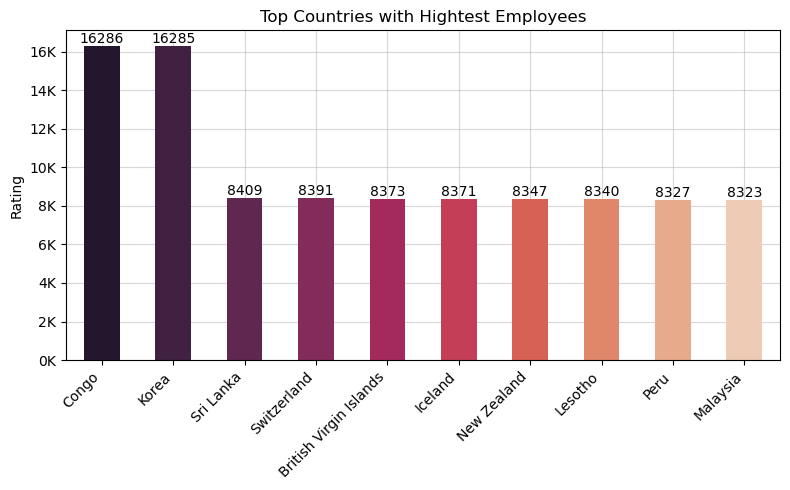

In [157]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_top_country_emp_count,x="Country",y="Rating",hue="Country",palette='rocket',width=0.5,legend=False)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)

plt.title("Top Countries with Hightest Employees")
plt.xlabel("")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

Is there a correlation between performance rating and salary ?

In [160]:
df_corr = df.select_dtypes(include="number").corr()
df_corr

,Performance_Rating,Experience_Years,Salary_INR
Performance_Rating,1.000000,-0.000283,-0.000209
Experience_Years,-0.000283,1.000000,0.000796
Salary_INR,-0.000209,0.000796,1.000000


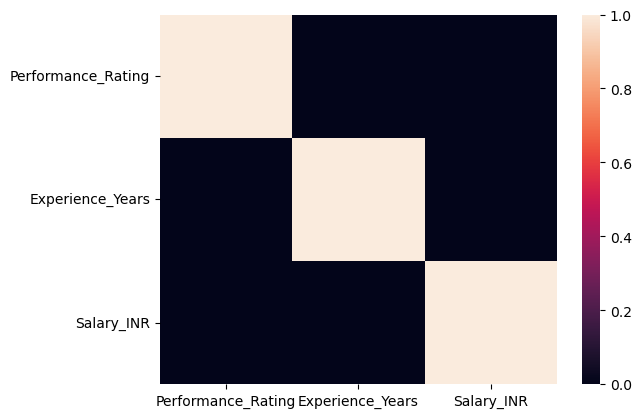

In [163]:
plt.clf()
sns.heatmap(df_corr)
plt.show()

How has the number of hires changed over time (per year) ?

In [164]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country
1959515,EMP1959516,Rebekah Brady,IT,Software Engineer,2022-02-07,"South Nicole, Guadeloupe",5,3,Active,Remote,1067919,South Nicole,Guadeloupe


In [165]:
df['Year'] = pd.to_datetime(df['Hire_Date']).dt.year

In [166]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country,Year
683059,EMP0683060,Hannah Martin,Sales,Sales Director,2020-03-17,"South Alicia, Thailand",2,5,Active,On-site,442683,South Alicia,Thailand,2020


In [170]:
df_yearly_employee = df.groupby("Year")['Employee_ID'].count().reset_index(name='Count')
df_yearly_employee

,Year,Count
0,2010,15520
1,2011,40089
2,2012,39765
3,2013,39988
4,2014,40202
5,2015,85984
6,2016,160249
7,2017,160363
8,2018,159658
9,2019,160202


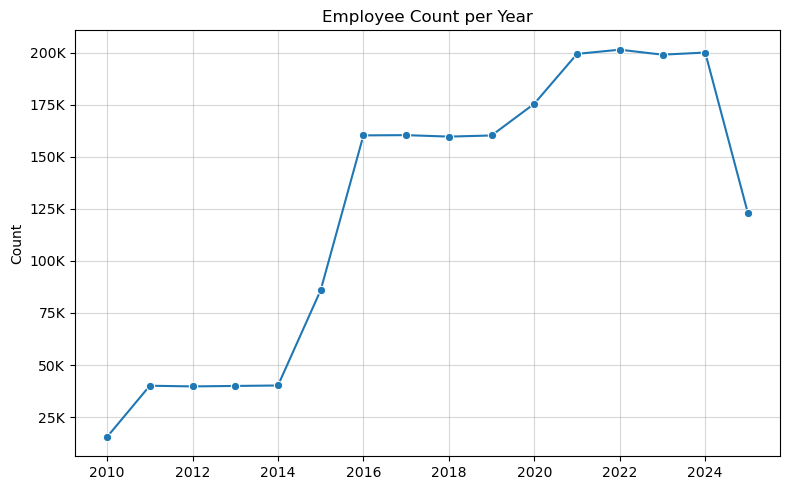

In [183]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_yearly_employee,x="Year",y="Count",marker='o')
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)
plt.xlabel("")
plt.title("Employee Count per Year")
plt.tight_layout()
plt.show()

 Compare salaries of Remote vs. On-site employees — is there a significant difference ?

In [185]:
df_mode_salary = df.groupby("Work_Mode")['Salary_INR'].mean().sort_values().reset_index(name="Salary")
df_mode_salary

,Work_Mode,Salary
0,On-site,896835.945792
1,Remote,896965.326373


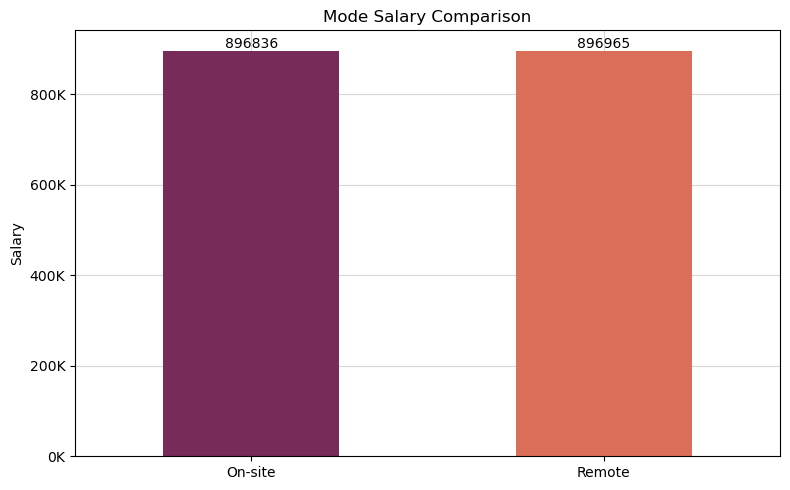

In [187]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_mode_salary,x="Work_Mode",y="Salary",hue="Work_Mode",palette='rocket',width=0.5,legend=False)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)
for container in ax.containers:
    ax.bar_label(container)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x,_: f"{x/1000:.0f}K")
)

plt.title("Mode Salary Comparison")
plt.xlabel("")
plt.tight_layout()
plt.show()

 Find the top 10 employees with the highest salary in each department.

In [188]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country,Year
273740,EMP0273741,Cheryl Tate,Marketing,Content Strategist,2016-10-01,"Brownborough, Guinea",4,8,Active,Remote,651043,Brownborough,Guinea,2016


In [201]:
df.groupby("Department").apply(lambda x: x.nlargest(10, "Salary_INR"))

Employee_ID           Full_Name  \
Department                                           
Finance    888712   EMP0888713   Christopher Sloan   
           695808   EMP0695809        Todd Rodgers   
           459273   EMP0459274        Angela Payne   
           750893   EMP0750894           Nina Lara   
           780290   EMP0780291   Brittany Thompson   
...                        ...                 ...   
Sales      86194    EMP0086195    Gabrielle Phelps   
           1116580  EMP1116581     Kimberly Mullen   
           1760918  EMP1760919  Christopher Farmer   
           1878661  EMP1878662    Margaret Gardner   
           1333220  EMP1333221      Benjamin Jones   

                                       Job_Title   Hire_Date  \
Department                                                     
Finance    888712                Finance Manager  2011-07-19   
           695808                Finance Manager  2019-12-27   
           459273                Finance Manager  2021-08-12   
           750893                Finance Manager  2021-10-19   
           780290                Finance Manager  2021-07-23   
...                                          ...         ...   
Sales      86194    Business Development Manager  2015-11-23   
           1116580  Business Development Manager  2025-01-09   
           1760918  Business Development Manager  2013-01-12   
           1878661  Business Development Manager  2025-04-23   
           1333220  Business Development Manager  2017-11-14   

                                                      Location  \
Department                                                       
Finance    888712                        East Ashley, Portugal   
           695808                          North Taylor, Ghana   
           459273                 South Ravenport, Isle of Man   
           750893            North Christopher, American Samoa   
           780290                 East Melissaside, Martinique   
...                                                        ...   
Sales      86194    New Michaelshire, Central African Republic   
           1116580                          Welchberg, Uruguay   
           1760918                         West Mark, Dominica   
           1878661                         Gentryburgh, Serbia   
           1333220                      East Marissa, Slovenia   

                    Performance_Rating  Experience_Years    Status Work_Mode  \
Department                                                                     
Finance    888712                    1                14    Active   On-site   
           695808                    1                 5    Active   On-site   
           459273                    5                 4    Active    Remote   
           750893                    4                 3    Active   On-site   
           780290                    1                 4    Active   On-site   
...                                ...               ...       ...       ...   
Sales      86194                     4                 9  Resigned    Remote   
           1116580                   3                 0  Resigned   On-site   
           1760918                   4                12   Retired   On-site   
           1878661                   1                 0    Active   On-site   
           1333220                   1                 7  Resigned    Remote   

                    Salary_INR               City                   Country  \
Department                                                                    
Finance    888712      2499958        East Ashley                  Portugal   
           695808      2499929       North Taylor                     Ghana   
           459273      2499925    South Ravenport               Isle of Man   
           750893      2499813  North Christopher            American Samoa   
           780290      2499786   East Melissaside                Martinique   
...                        ...

 Identify departments with the highest attrition rate (Resigned %).

In [203]:
df.sample()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,City,Country,Year
1033706,EMP1033707,Jordan Johnson,IT,Data Analyst,2019-07-31,"Jenkinsshire, Cocos (Keeling) Islands",3,6,Active,On-site,733460,Jenkinsshire,Cocos (Keeling) Islands,2019


In [205]:
df_department

,Department,Employee_count
2,IT,601042
6,Sales,400031
4,Operations,300095
3,Marketing,240081
0,Finance,199873
1,HR,159119
5,R&D,99759


In [204]:
df_resigned = df[df["Status"]=="Resigned"].groupby("Department")['Employee_ID'].count().reset_index(name='Resigned_count').sort_values("Resigned_count",ascending=False)
df_resigned

,Department,Resigned_count
2,IT,119852
6,Sales,79725
4,Operations,59397
3,Marketing,47793
0,Finance,40238
1,HR,31736
5,R&D,19919


In [206]:
df_attrition = df_department.merge(df_resigned, on="Department", how="left")
df_attrition

,Department,Employee_count,Resigned_count
0,IT,601042,119852
1,Sales,400031,79725
2,Operations,300095,59397
3,Marketing,240081,47793
4,Finance,199873,40238
5,HR,159119,31736
6,R&D,99759,19919


In [209]:
df_attrition['Resign_rate_perc'] = df_attrition["Resigned_count"]/df_attrition["Employee_count"]*100

In [211]:
df_attrition.sort_values(by='Resign_rate_perc',ascending=False)

,Department,Employee_count,Resigned_count,Resign_rate_perc
4,Finance,199873,40238,20.131784
6,R&D,99759,19919,19.967121
5,HR,159119,31736,19.944821
0,IT,601042,119852,19.940703
1,Sales,400031,79725,19.929705
3,Marketing,240081,47793,19.907031
2,Operations,300095,59397,19.792732


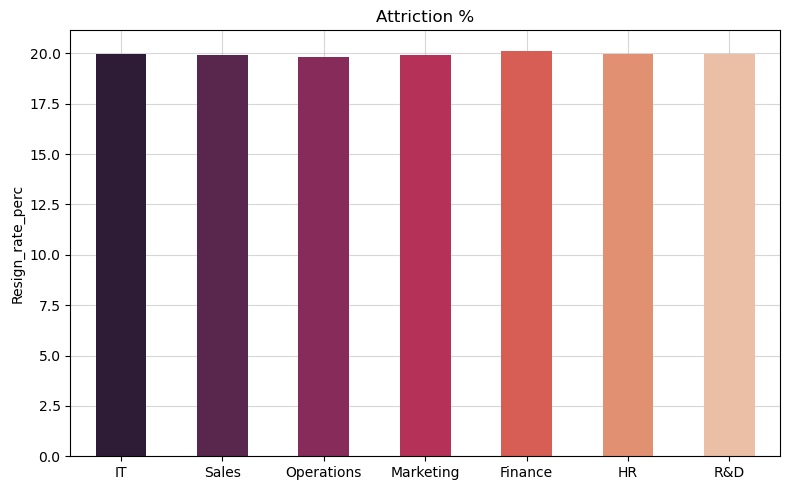

In [212]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_attrition,x="Department",y="Resign_rate_perc",hue="Department",palette='rocket',width=0.5,legend=False)
ax = plt.gca()
ax.set_axisbelow(True)  
ax.grid(True, alpha=0.5)

plt.title("Attriction %")
plt.xlabel("")
plt.tight_layout()
plt.show()
